In [ ]:
Q.1 Plot a bar chart showing count of individual species?

In [ ]:
Q.2 Identify outliers and remove if any? 

In [ ]:
Q.3 Build a regression model and print regression equation?

In [ ]:
Q.4 What is the mean score of the model at 95% confidence
interval?

In [ ]:
Q.5 Compare real and predicted weights and give a
conclusion statement based on it?

In [1]:
import zipfile
import pandas as ps
import numpy as pn
import seaborn as sns
import matplotlib .pyplot as mt
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [2]:
with zipfile.ZipFile(r"C:\Users\Harshit\Downloads\164941695852160ec2379f8793842aa5b168a_.zip") as x:
    with x.open(r"3 Linear Regression using Python/Fish_dataset.csv") as v:
        fd = ps.read_csv(v)
fd.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [3]:
fd.shape

(159, 7)

In [4]:
fd.isnull().sum()/len(fd)*100

Species    0.0
Weight     0.0
Length1    0.0
Length2    0.0
Length3    0.0
Height     0.0
Width      0.0
dtype: float64

In [5]:
fd.describe

<bound method NDFrame.describe of     Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]>

In [6]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [7]:
fd.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [8]:
fd.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [9]:
# Q.1 Plot a bar chart showing count of individual species?

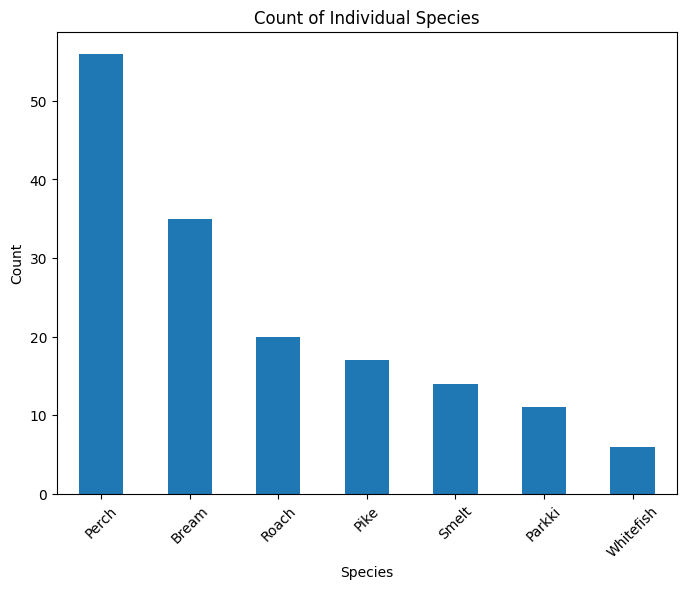

In [10]:
species_count = fd['Species'].value_counts()

mt.figure(figsize=(8, 6))
species_count.plot(kind='bar')
mt.xlabel('Species')
mt.ylabel('Count')
mt.title('Count of Individual Species')
mt.xticks(rotation=45)
mt.show()

In [11]:
# Q.2 Identify outliers and remove if any? 

In [12]:
# Define a function to remove outliers based on Z-score
def remove_outliers(fd, z_thresh=3):
    # Calculate Z-scores for each numeric column
    z_scores = pn.abs(stats.zscore(fd.select_dtypes(include=pn.number)))

    # Create a boolean mask where True indicates an outlier
    is_outlier = (z_scores > z_thresh).any(axis=1)

    # Remove rows with outliers
    df_no_outliers = fd[~is_outlier].copy()

    return df_no_outliers

# Apply the remove_outliers function on the DataFrame
df_no_outliers = remove_outliers(fd)


In [13]:
df_no_outliers

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [14]:
# As we can clearly see that we had outliers in our dataset 

In [15]:
# Q.3 Build a regression model and print regression equation?

In [16]:
# Separate the target variable (Weight) and predictor variables (Length1, Length2, Length3, Height, Width)
X = fd[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
y = fd['Weight']

In [17]:
# Create the linear regression model
reg_model = LinearRegression()

# Fit the model to the data
reg_model.fit(X, y)

LinearRegression()

In [18]:
# Print the regression equation
coefficients = reg_model.coef_
intercept = reg_model.intercept_

equation = "Weight = {:.2f}".format(intercept)
for i, col in enumerate(X.columns):
    equation += " + {:.2f} * {}".format(coefficients[i], col)

print("Regression Equation:")
print(equation)

Regression Equation:
Weight = -499.59 + 62.36 * Length1 + -6.53 * Length2 + -29.03 * Length3 + 28.30 * Height + 22.47 * Width


In [19]:
# Q.4 What is the mean score of the model at 95% confidence
# interval?

In [20]:
# Create the linear regression model
reg_model = LinearRegression()

# Perform cross-validation and obtain the scores
# cv=5 means we are using 5-fold cross-validation
scores = cross_val_score(reg_model, X, y, cv=5)

In [21]:
# Calculate the mean score
mean_score = scores.mean()

# Calculate the confidence interval (95%)
confidence_interval = (scores.mean() - 1.96 * scores.std(), scores.mean() + 1.96 * scores.std())

In [22]:
confidence_interval

(-0.6629621741232135, 1.6649944250566273)

In [23]:
mean_score

0.5010161254667069

In [24]:
# Q.5 Compare real and predicted weights and give a
# conclusion statement based on it?

In [25]:
# Separate the target variable (Weight) and predictor variables (Length1, Length2, Length3, Height, Width)
X = fd[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
y = fd['Weight']

In [26]:
# Create the linear regression model
reg_model = LinearRegression()

# Fit the model to the data
reg_model.fit(X, y)

LinearRegression()

In [27]:
# Predict the weights based on the model
predicted_weights = reg_model.predict(X)

In [28]:
# Create a new DataFrame to store the real and predicted weights side by side
comparison_df = ps.DataFrame({'Real Weight': y, 'Predicted Weight': predicted_weights})

# Print the comparison DataFrame
print(comparison_df)

     Real Weight  Predicted Weight
0          242.0        326.816128
1          290.0        369.578593
2          340.0        370.824180
3          363.0        439.056139
4          430.0        444.169168
..           ...               ...
154         12.2       -160.608116
155         13.4       -145.535439
156         12.2       -137.843413
157         19.7        -83.279758
158         19.9        -82.005694

[159 rows x 2 columns]


In [29]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict the weights based on the model
predicted_weights = reg_model.predict(X)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, predicted_weights)

# Calculate Root Mean Squared Error (RMSE)
rmse = mse ** 0.5

# Calculate R-squared (R2)
r2 = r2_score(y, predicted_weights)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 14607.878944541946
Root Mean Squared Error (RMSE): 120.86305864300284
R-squared (R2): 0.8852867046546207
